# AI & ML Task 2
## Feature Engineering, Model Optimization & Performance Comparison

In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [20]:

housing = pd.read_csv("housing.csv")
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:

X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]


In [22]:

X = pd.get_dummies(X, drop_first=True)


In [23]:


print(X.isna().sum())

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64


In [24]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=8, random_state=42)
}


## Model Performance Comparison Table


In [26]:

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
results_df


,Model,RMSE,R2 Score
0,Linear Regression,70031.419920,0.625735
1,Ridge Regression,70028.478685,0.625767
2,Decision Tree,62803.245498,0.699006


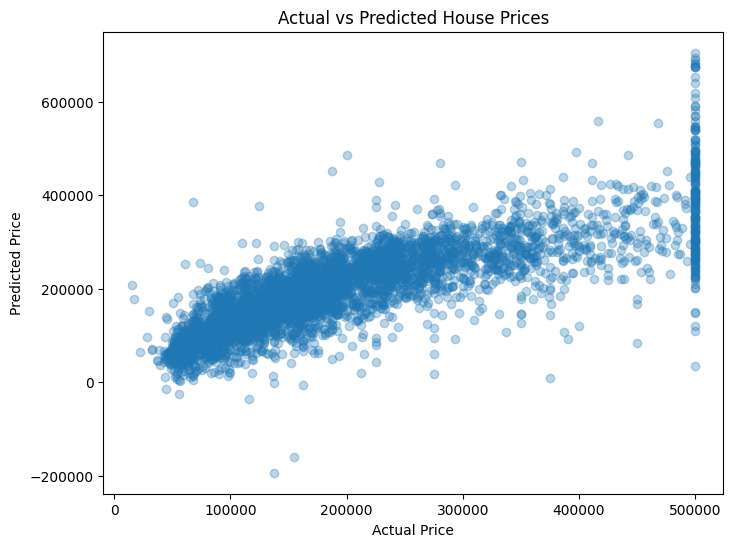

In [27]:

best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [28]:

sample = X.sample(1, random_state=1)
sample_scaled = scaler.transform(sample)
prediction = best_model.predict(sample_scaled)

print("Sample features:")
print(sample)
print("Predicted house price:", prediction[0])


Sample features:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4712    -118.36     34.06                39.0       2810.0           670.0   

      population  households  median_income  ocean_proximity_INLAND  \
4712      1109.0       624.0           3.25                   False   

      ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
4712                   False                     False   

      ocean_proximity_NEAR OCEAN  
4712                       False  
Predicted house price: 244578.649929157
